In [ ]:
!pip install langchain langgraph --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 16.2 MB/s eta 0:00:00


## States

In [ ]:
from typing_extensions import TypedDict

In [ ]:
class State(TypedDict):
  graph_state : str

## Nodes

In [ ]:
def first_node(state):
  print("My first node is called.")
  return {"graph_state": state['graph_state'] + "I am playing "}

def second_node(state):
  print("My second node is called.")
  return {"graph_state": state['graph_state'] + "Cricket "}

def third_node(state):
  print("My third node is called.")
  return {"graph_state": state['graph_state'] + "Video Game " }

def fourth_node(state):
  print("Ny fourth node is called.")
  return {"graph_state": state['graph_state'] + "on the ground."}

def fifth_node(state):
  print("My fifth node is called.")
  return {"graph_state": state['graph_state'] + "on the ps5."}

def sixth_node(state):
  print("My sixth node is called.")
  return {"graph_state": state['graph_state'] + "on the xbox."}

def seventh_node(state):
  print("My seventh node is called.")
  return {"graph_state": state['graph_state'] + "on the switch."}

## Edges

In [ ]:
import random
from typing import Literal

In [ ]:
def decide_play(state) -> Literal["second_node", "third_node"]:
  graph_state = state["graph_state"]

  if random.random() < 0.5:
    return "second_node"
  return "third_node"

def decide_game_station(state) -> Literal["sixth_node","seventh_node"]:
  graph_state = state["graph_state"]

  if random.random() < 0.7:
    return "sixth_node"
  return "seventh_node"

def decide_cricket_loc(state) -> Literal["fourth_node", "fifth_node"]:
  graph_state = state["graph_state"]

  if random.random() < 0.3:
    return "fourth_node"
  return "fifth_node"

## Graph

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [ ]:
# Build Graph
builder = StateGraph(State)

builder.add_node("first_node", first_node)
builder.add_node("second_node", second_node)
builder.add_node("third_node", third_node)
builder.add_node("fourth_node", fourth_node)
builder.add_node("fifth_node", fifth_node)
builder.add_node("sixth_node", sixth_node)
builder.add_node("seventh_node", seventh_node)

## Build the conditional edges
builder.add_edge(START, "first_node")
builder.add_conditional_edges("first_node", decide_play)
builder.add_conditional_edges("second_node", decide_cricket_loc)
builder.add_conditional_edges("third_node", decide_game_station)
builder.add_edge("fourth_node", END)
builder.add_edge("fifth_node", END)
builder.add_edge("sixth_node", END)
builder.add_edge("seventh_node", END)

graph = builder.compile()

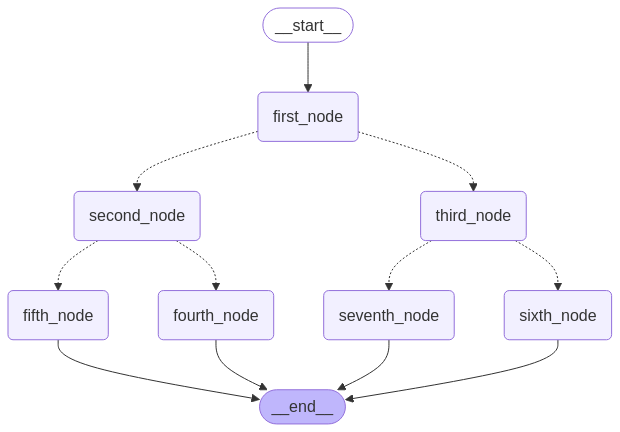

In [ ]:
## View graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Invoke agent
graph.invoke({"graph_state":"Hi,My name is Night,"})

My first node is called.
My third node is called.
My seventh node is called.


{'graph_state': 'Hi,My name is Night,I am playing Video Game on the switch.'}